In [103]:
import pandas as pd

data = pd.read_excel('hackaton_data_5post.xlsx')
data.head()

,ADDRESS,CITY,REGION,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
0,"г.Калуга, Литейная ул., 25/15",КАЛУГА,Калужская область,NaN,3.3,NaN,13.0,1.0,7696.0,10099,3382,324698,0,0,NaN,остановка,423321
1,"г.Калуга, Гагарина ул., 1",КАЛУГА,Калужская область,NaN,NaN,NaN,NaN,NaN,6369.0,10068,3236,324698,1,1,NaN,остановка,423321
2,"г.Калуга, Кибальчича ул., 25",КАЛУГА,Калужская область,NaN,3.1,NaN,12.0,1.0,5553.0,10100,3436,324698,1,0,NaN,NaN,423321
3,"г.Калуга, Пестеля ул., 60/49",КАЛУГА,Калужская область,3.0,2.2,0.0,12.0,1.0,7162.0,10099,3257,324698,0,0,NaN,NaN,423321
4,"г.Калуга, Ленина ул., 81",КАЛУГА,Калужская область,1.0,2.0,0.0,9.0,1.0,6269.0,10096,3195,324698,1,0,NaN,остановка,423321


In [159]:
def replace_binary_value(b):
    if b and pd.notnull(b):
        return 1
    else:
        return 0

data.iloc[:, 12:16] = data.iloc[:, 12:16].agg(lambda row: row.agg(replace_binary_value, axis=0), axis=1)

data_kal_obl = data[data['REGION'] == 'Калужская область']
data_tul_obl = data[data['REGION'] == 'Тульская область']

Построим графики попарных распределений признаков и целевых переменных:

/Users/kostya/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kostya/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


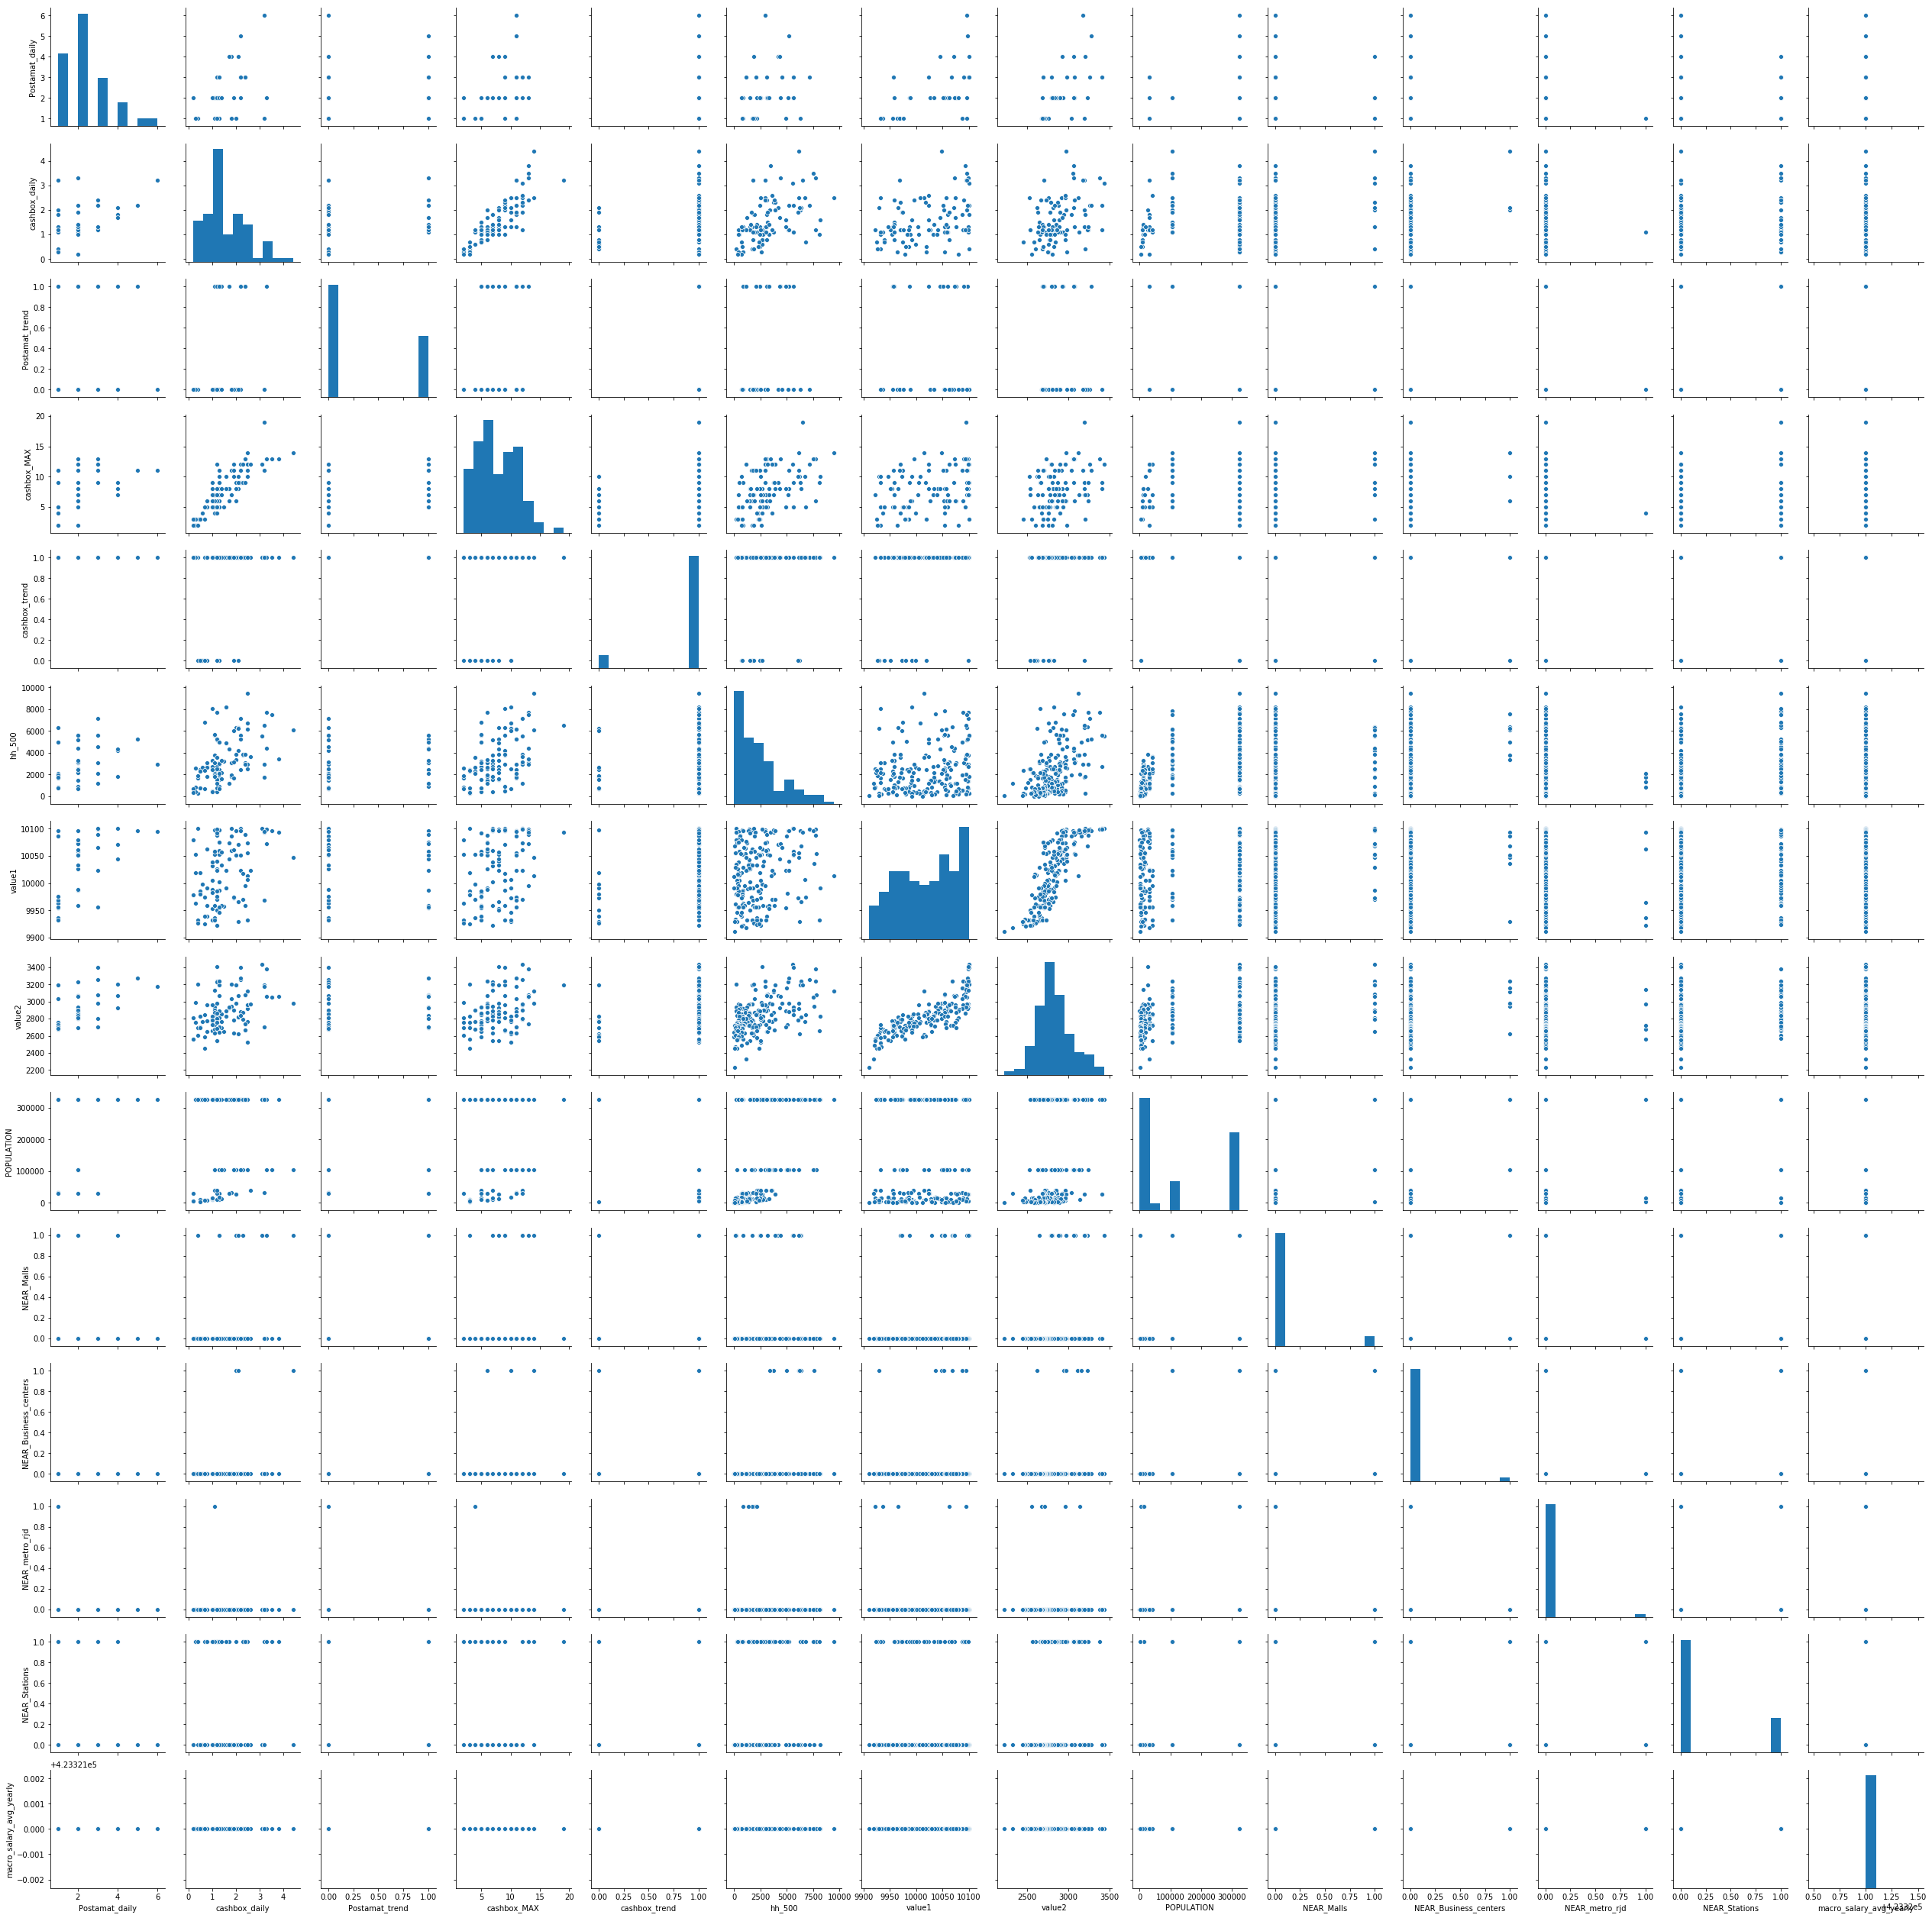

In [105]:
import seaborn as sns

sns.pairplot(data_kal_obl.iloc[:, 3:17])

Видно, что города с большим населением (областные центры, т.е. Калуга и Тула) выбиваются из общего распределения, следовательно их надо рассматирвать отдельно

In [160]:
data_kaluga = data_kal_obl[data_kal_obl['CITY'] == 'КАЛУГА']
data_tula = data_tul_obl[data_tul_obl['CITY'] == 'ТУЛА']
data_kal_obl = data_kal_obl[data_kal_obl['CITY'] != 'КАЛУГА']
data_tul_obl = data_tul_obl[data_tul_obl['CITY'] != 'ТУЛА']
for data in [data_kaluga, data_tula, data_kal_obl, data_tul_obl]:
    data['was_predicted'] = 0

Найдем сначала зависимость среднего количества посылок, выданных в кассе

In [107]:
X = data_kaluga[data_kaluga['cashbox_daily'].notnull()].iloc[:, 6:18]

In [108]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 239
Data columns (total 11 columns):
cashbox_MAX                57 non-null float64
cashbox_trend              55 non-null float64
hh_500                     57 non-null float64
value1                     57 non-null int64
value2                     57 non-null int64
POPULATION                 57 non-null int64
NEAR_Malls                 57 non-null int64
NEAR_Business_centers      57 non-null int64
NEAR_metro_rjd             57 non-null int64
NEAR_Stations              57 non-null int64
macro_salary_avg_yearly    57 non-null int64
dtypes: float64(3), int64(8)
memory usage: 5.3 KB


In [109]:
X.describe()

,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
count,57.000000,55.000000,57.000000,57.000000,57.000000,57.0,57.000000,57.000000,57.000000,57.000000,57.0
mean,7.701754,0.836364,3839.456140,10023.807018,2926.052632,324698.0,0.122807,0.017544,0.017544,0.473684,423321.0
std,3.545444,0.373355,2302.232566,58.251744,225.818544,0.0,0.331133,0.132453,0.132453,0.503745,0.0
min,2.000000,0.000000,237.000000,9927.000000,2543.000000,324698.0,0.000000,0.000000,0.000000,0.000000,423321.0
25%,5.000000,1.000000,2127.000000,9973.000000,2766.000000,324698.0,0.000000,0.000000,0.000000,0.000000,423321.0
50%,8.000000,1.000000,3105.000000,10019.000000,2870.000000,324698.0,0.000000,0.000000,0.000000,0.000000,423321.0
75%,10.000000,1.000000,5619.000000,10088.000000,3075.000000,324698.0,0.000000,0.000000,0.000000,1.000000,423321.0
max,19.000000,1.000000,9463.000000,10100.000000,3436.000000,324698.0,1.000000,1.000000,1.000000,1.000000,423321.0


Обработаем признаки и целевые переменные:

In [110]:
del X['POPULATION']
del X['macro_salary_avg_yearly']

Мы удалили эти столюцы, так как в них везде одинаковые значения

In [111]:
import numpy as np

X.fillna(0, inplace=True)
X = (X - X.mean()) / X.std()

In [112]:
y = data_kaluga[data_kaluga['cashbox_daily'].notnull()]['cashbox_daily']
y = (y - y.mean()) / y.std()

In [113]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

lasso = Lasso(0.05)
ridge = Ridge()
lin_reg = LinearRegression()

Проверим, что модель Лассо адекватно приближает значения:

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

lasso.fit(X_train, y_train)
print(mse(y_test, lasso.predict(X_test)), mae(y_test, lasso.predict(X_test)))

0.13885256478246952 0.3081859421678883


Применим модель Лассо для отбора значащих признаков:

In [115]:
lasso.fit(X, y)
lasso.coef_

array([ 0.7950587 ,  0.        ,  0.        ,  0.04516096,  0.05593081,
       -0.        ,  0.        ,  0.01609916, -0.06898949])

In [116]:
X.corr()

,cashbox_MAX,cashbox_trend,hh_500,value1,value2,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations
cashbox_MAX,1.000000,0.300054,0.514976,0.397362,0.437021,0.046965,0.087393,-0.140762,0.050518
cashbox_trend,0.300054,1.000000,0.261985,0.436464,0.419984,0.047525,-0.273268,-0.273268,0.018744
hh_500,0.514976,0.261985,1.000000,0.149227,0.330607,-0.130335,0.138233,-0.100281,-0.039715
value1,0.397362,0.436464,0.149227,1.000000,0.910581,0.313233,-0.219422,-0.203222,-0.080200
value2,0.437021,0.419984,0.330607,0.910581,1.000000,0.312035,-0.180929,-0.146899,-0.017491
NEAR_Malls,0.046965,0.047525,-0.130335,0.313233,0.312035,1.000000,-0.050000,-0.050000,-0.033806
NEAR_Business_centers,0.087393,-0.273268,0.138233,-0.219422,-0.180929,-0.050000,1.000000,-0.017857,-0.126773
NEAR_metro_rjd,-0.140762,-0.273268,-0.100281,-0.203222,-0.146899,-0.050000,-0.017857,1.000000,0.140859
NEAR_Stations,0.050518,0.018744,-0.039715,-0.080200,-0.017491,-0.033806,-0.126773,0.140859,1.000000


Признаки value1 и value2 получили ненулевые веса, однако у них большая корреляция, поэтому один из них не надо учитывать. Посчитаем веса у всех признаков с отсутствующими value2 и value1:

In [117]:
lasso.fit(X.drop(labels='value1', axis=1), y)
lasso.coef_

array([ 0.7949395 ,  0.        ,  0.        ,  0.09664327, -0.        ,
        0.        ,  0.01323896, -0.07149039])

In [118]:
lasso.fit(X.drop(labels='value2', axis=1), y)
lasso.coef_

array([ 0.79889328,  0.        ,  0.00198145,  0.09487306, -0.        ,
        0.        ,  0.01836106, -0.0664145 ])

При отсутвуещем value2 вес признака hh_500 перестает быть нулевым, то есть имеется какая-то неявная зависимоть между value2 и hh_500, но нет зависимотсти между hh_500 и value1 (также можно заметить, что корреляция между этими парами признаков отличаются больше, чем в два раза). Поэтому следует оставить value1.

In [119]:
X.drop(labels=['cashbox_trend', 'value2', 'NEAR_Malls', 'NEAR_Business_centers'], axis=1, inplace=True)

In [120]:
X.head()

,cashbox_MAX,hh_500,value1,NEAR_metro_rjd,NEAR_Stations
0,1.494381,1.675132,1.290828,-0.132453,1.044805
2,1.212329,0.744297,1.307995,-0.132453,-0.940325
3,1.212329,1.443183,1.290828,-0.132453,-0.940325
4,0.366173,1.055299,1.239327,-0.132453,1.044805
6,-0.479983,1.678173,1.101992,-0.132453,1.044805


In [121]:
def test_regressor(X, y, regressor):
    mean_mse = 0
    mean_mae = 0
    
    for i in range(100):
        X_train , X_test, y_train, y_test = train_test_split(X, y)
        regressor.fit(X_train, y_train)
        mean_mse += mse(y_test, regressor.predict(X_test))
        mean_mae += mae(y_test, regressor.predict(X_test))
        
    print('MSE = ', mean_mse/100)
    print('MAE = ', mean_mae/100)

Выявим лучшую модель линейной регрессии:

In [122]:
print('LinReg:')
test_regressor(X, y, lin_reg)

print('Lasso:')
test_regressor(X, y, lasso)

print('Ridge:')
test_regressor(X, y, ridge)

LinReg:
MSE =  0.24197400372679123
MAE =  0.38242808512763027
Lasso:
MSE =  0.2400585718309297
MAE =  0.3843142201572245
Ridge:
MSE =  0.24547844968462226
MAE =  0.38730109691885223


Большого различия в точности между ними нет, однако чуть точнее все-таки Ridge.
Далее изучим точности некоторых других регрессионых моделей: 

In [123]:
from sklearn.tree import DecisionTreeRegressor

des_tree = DecisionTreeRegressor()

print('DesTree:')
test_regressor(X, y, des_tree)

DesTree:
MSE =  0.4225065104956296
MAE =  0.49057258733551484


In [124]:
from sklearn.tree import ExtraTreeRegressor

extra_tree = ExtraTreeRegressor()

print('ExtraTree:')
test_regressor(X, y, extra_tree)

ExtraTree:
MSE =  0.5127763040483765
MAE =  0.5423892188837374


In [125]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

print('KNN:')
test_regressor(X, y, knn)

KNN:
MSE =  0.38193091580105515
MAE =  0.47650919293347094


Видно, что модель Ridge оказалась наилучшей. На остальных датасетах применим ту же стратегию (в силу идентичности данных, различий не будет)

Проведем подобную аналитику для остальных датасетов:

In [126]:
def getBenchmark(X, y, lasso_coef=0.05):
    lasso = Lasso(lasso_coef)
    ridge = Ridge()
    lin_reg = LinearRegression()
    des_tree = DecisionTreeRegressor()
    extra_tree = ExtraTreeRegressor()
    knn = KNeighborsRegressor()
    
    
    print('LinReg:')
    test_regressor(X, y, lin_reg)
    print('Lasso:')
    test_regressor(X, y, lasso)
    print('Ridge:')
    test_regressor(X, y, ridge)
    print('ExtraTree:')
    test_regressor(X, y, extra_tree)
    print('KNN:')
    test_regressor(X, y, knn)
    print('DesTree:')
    test_regressor(X, y, des_tree)
    
def getPredict(X, regressor):
    df = data.iloc[:, labels]
    df['cashbox_MAX'] = 0

    df[target_name] = regressor.predict(df)
    return df

def get_X_y_train(data, target):
    X = data[data[target].notnull()].iloc[:, 6:18]
    for column in X.columns:
        if (X[column].std() == 0):
            del X[column]
            
    X.fillna(0, inplace=True)
    X = (X - X.mean()) / X.std()
    y = data_kal_obl[data_kal_obl[target].notnull()][target]
    y = (y - y.mean()) / y.std()
    return X, y

def get_X_y_predict(data, target):
    X = data[data[target].isnull()].iloc[:, 6:18]
    for column in X.columns:
        if (X[column].std() == 0):
            del X[column]
            
    X.fillna(0, inplace=True)
    X = (X - X.mean()) / X.std()
    y = data_kal_obl[data_kal_obl[target].isnull()][target]
    return X, y

In [127]:
X, y = get_X_y_train(data_kal_obl, 'cashbox_daily')

In [128]:
lasso.fit(X, y)
non_null_weights = lasso.coef_.nonzero()
non_null_weights

(array([0, 2, 5, 6, 7]),)

In [129]:
non_null_weights = non_null_weights[0]

X = X.iloc[:, non_null_weights]
X.head()

,cashbox_MAX,hh_500,POPULATION,NEAR_Malls,NEAR_Business_centers
23,1.584952,2.932212,1.160916,-0.267409,-0.215724
24,1.896281,2.085949,1.160916,3.654594,4.530202
35,0.339632,0.137279,1.160916,-0.267409,-0.215724
51,-0.283027,0.648958,1.160916,-0.267409,-0.215724
52,0.962292,2.106784,1.160916,-0.267409,-0.215724


In [130]:
getBenchmark(X, y)

LinReg:
MSE =  0.30792140467615914
MAE =  0.42619375679377197
Lasso:
MSE =  0.28690862846386866
MAE =  0.40281839452661056
Ridge:
MSE =  0.2872293695148718
MAE =  0.41495570750347244
ExtraTree:
MSE =  0.6896093401655928
MAE =  0.6218148378793549
KNN:
MSE =  0.535278809705101
MAE =  0.5357715721714656
DesTree:
MSE =  0.6107351538973372
MAE =  0.586084305056507


In [161]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
 
lasso = Lasso(0.05)
lin_reg = LinearRegression()
ridge = Ridge()
des_tree = DecisionTreeRegressor()
extra_tree = ExtraTreeRegressor()
knn = KNeighborsRegressor()
 
 
def test_regressor(X, y, regressor):
    mean_mse = 0
 
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        regressor.fit(X_train, y_train)
        mean_mse += mse(y_test, regressor.predict(X_test))
 
    return mean_mse / 100
 
def benchmark(X, y):
    lasso = Lasso()
    ridge = Ridge()
    lin_reg = LinearRegression()
    des_tree = DecisionTreeRegressor()
    extra_tree = ExtraTreeRegressor()
    knn = KNeighborsRegressor(n_neighbors=min(5, len(X) - 1))
    result = lasso
    min_error = test_regressor(X, y, lasso)
    for reg in [ridge, lin_reg, des_tree, extra_tree, knn]:
        error = test_regressor(X, y, reg)
        if (error < min_error):
            min_error = error
            result = reg
 
    return reg, min_error
 
 
def get_X_y_train(data, target):
    X = data[data[target].notnull()].iloc[:, 5:18]
 
    X.fillna(0, inplace=True)
    X = (X - X.mean())
    y = data[data[target].notnull()][target]
    return X, y
 
 
def get_X_y_predict(data, target):
    X = data[data[target].isnull()].iloc[:, 5:18]
    X.fillna(0, inplace=True)
    X = (X - X.mean())
    y = data[data[target].isnull()][target]
    return X, y
 
def fill_data(data, target):
    data1 = data
    X, y = get_X_y_train(data, target)
    y_mean = y.mean()
    y -= y_mean
    lasso.fit(X, y)
    non_null_weights = lasso.coef_.nonzero()[0]
    features = non_null_weights
    if  (non_null_weights == 4).any() and (non_null_weights == 5).any():
        feature_1 = (non_null_weights != 4).nonzero()[0]
        lasso.fit(X.iloc[:, feature_1], y)
        m_1 = lasso.coef_.nonzero()[0].sum()
        feature_2 = (non_null_weights != 4).nonzero()[0]
        lasso.fit(X.iloc[:, feature_2], y)
        m_2 = lasso.coef_.nonzero()[0].sum()
        if (m_1 < m_2):
            features =  feature_2
        else:
            features = feature_1
 
    X = X.iloc[:, features]
    regressor, error = benchmark(X, y)
 
    print(error)
 
    regressor.fit(X, y)
    X_predict, y_predict = get_X_y_predict(data, target)
    X_predict = X_predict.iloc[:, features]
    y_predict = regressor.predict(X_predict) + y_mean
    count = 0
    for i in data.index:
        if np.isnan(data[target][i]):
            data[target][i] = y_predict[count]
            data['was_predicted'][i] = 1
            count += 1
            if count >= len(y_predict):
                break
    return data

/Users/kostya/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kostya/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


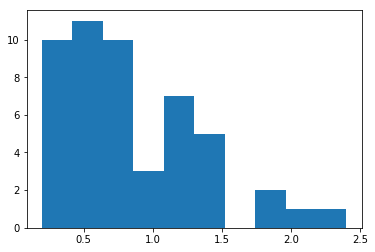

In [162]:
from matplotlib import pyplot as plt

plt.hist(data_tul_obl.cashbox_daily)
plt.show()

In [163]:
data_tul_obl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 32 to 415
Data columns (total 18 columns):
ADDRESS                    165 non-null object
CITY                       165 non-null object
REGION                     165 non-null object
Postamat_daily             12 non-null float64
cashbox_daily              50 non-null float64
Postamat_trend             12 non-null float64
cashbox_MAX                50 non-null float64
cashbox_trend              42 non-null float64
hh_500                     164 non-null float64
value1                     165 non-null int64
value2                     165 non-null int64
POPULATION                 165 non-null int64
NEAR_Malls                 165 non-null int64
NEAR_Business_centers      165 non-null int64
NEAR_metro_rjd             165 non-null int64
NEAR_Stations              165 non-null int64
macro_salary_avg_yearly    165 non-null int64
was_predicted              165 non-null int64
dtypes: float64(6), int64(9), object(3)
memory usage: 24

In [164]:
data_tul_obl = fill_data(data_tul_obl, 'cashbox_daily')

0.08133543165647836


/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


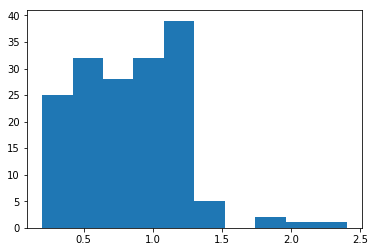

In [165]:
from matplotlib import pyplot as plt

plt.hist(data_tul_obl.cashbox_daily)
plt.show()

In [166]:
data_tul_obl = fill_data(data_tul_obl, 'Postamat_daily')
data_tul_obl.corr()

0.21999999999999997


/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Postamat_daily,cashbox_daily,Postamat_trend,cashbox_MAX,cashbox_trend,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly,was_predicted
Postamat_daily,1.000000,0.542451,0.633300,0.159219,-0.154974,0.723230,0.115470,0.313995,0.456955,0.151436,0.076980,0.138205,-0.029675,NaN,0.261732
cashbox_daily,0.542451,1.000000,0.173992,0.792822,0.266943,0.556356,0.107396,0.273103,0.358700,0.247904,0.185797,0.020793,0.014636,NaN,0.102996
Postamat_trend,0.633300,0.173992,1.000000,NaN,NaN,0.075333,-0.296820,-0.146359,0.497915,-0.134840,NaN,NaN,-0.134840,NaN,0.174078
cashbox_MAX,0.159219,0.792822,NaN,1.000000,0.202691,0.196490,-0.004418,0.070120,0.099532,0.039655,0.060461,-0.042551,-0.097666,NaN,0.159061
cashbox_trend,-0.154974,0.266943,NaN,0.202691,1.000000,0.173403,-0.104697,-0.067381,0.099182,0.135135,0.057411,-0.263038,-0.032880,NaN,-0.101956
hh_500,0.723230,0.556356,0.075333,0.196490,0.173403,1.000000,0.207155,0.434355,0.563600,0.267070,0.066256,0.011421,0.068059,NaN,0.031814
value1,0.115470,0.107396,-0.296820,-0.004418,-0.104697,0.207155,1.000000,0.900548,-0.127559,0.039426,-0.027803,-0.122705,0.057668,NaN,0.027803
value2,0.313995,0.273103,-0.146359,0.070120,-0.067381,0.434355,0.900548,1.000000,0.070057,0.133251,-0.016154,-0.056325,0.076627,NaN,0.011277
POPULATION,0.456955,0.358700,0.497915,0.099532,0.099182,0.563600,-0.127559,0.070057,1.000000,0.249941,0.051408,0.268723,0.268812,NaN,0.008876
NEAR_Malls,0.151436,0.247904,-0.134840,0.039655,0.135135,0.267070,0.039426,0.133251,0.249941,1.000000,0.128576,-0.046096,0.236024,NaN,0.039797


In [167]:
data_kaluga = fill_data(data_kaluga, 'cashbox_daily')
data_kaluga = fill_data(data_kaluga, 'Postamat_daily')

0.17826868585181835


/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1.329417783894754


/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [168]:
data_kal_obl = fill_data(data_kal_obl, 'cashbox_daily')
data_kal_obl = fill_data(data_kal_obl, 'Postamat_daily')

0.27730266939801135


/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.6707999999999998


/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [169]:
data_tula = fill_data(data_tula, 'cashbox_daily')
data_tula = fill_data(data_tula, 'Postamat_daily')

0.49000000000000143


/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2.326189813201897


/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
